In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA


# import warnings
# warnings.filterwarnings("ignore")

In [2]:
df_temperatur = pd.read_csv('../Modelling/Data/data_per_lokasi/data_fix_temp_96001.csv')
df_temperatur.head(10)
df_temperatur = df_temperatur.set_index('Date')

In [3]:
df_temperatur.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3475 entries, 2021-02-27 15:00:00 to 2023-04-13 21:00:00
Data columns (total 38 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lokasi        3475 non-null   int64  
 1   con_prec.mm.  3475 non-null   float64
 2   mic_prec.mm.  3475 non-null   float64
 3   sha_prec.mm.  3475 non-null   int64  
 4   suhu2m.degC.  3475 non-null   float64
 5   dew2m.degC.   3475 non-null   float64
 6   rh2m...       3475 non-null   float64
 7   wspeed.m.s.   3475 non-null   float64
 8   wdir.deg.     3475 non-null   float64
 9   lcloud...     3475 non-null   float64
 10  mcloud...     3475 non-null   float64
 11  hcloud...     3475 non-null   float64
 12  surpre.Pa.    3475 non-null   float64
 13  clmix.kg.kg.  3475 non-null   float64
 14  wamix.kg.kg.  3475 non-null   float64
 15  outlr.W.m2.   3475 non-null   float64
 16  pblh.m.       3475 non-null   float64
 17  lifcl.m.      3475 non-null   float64
 18  

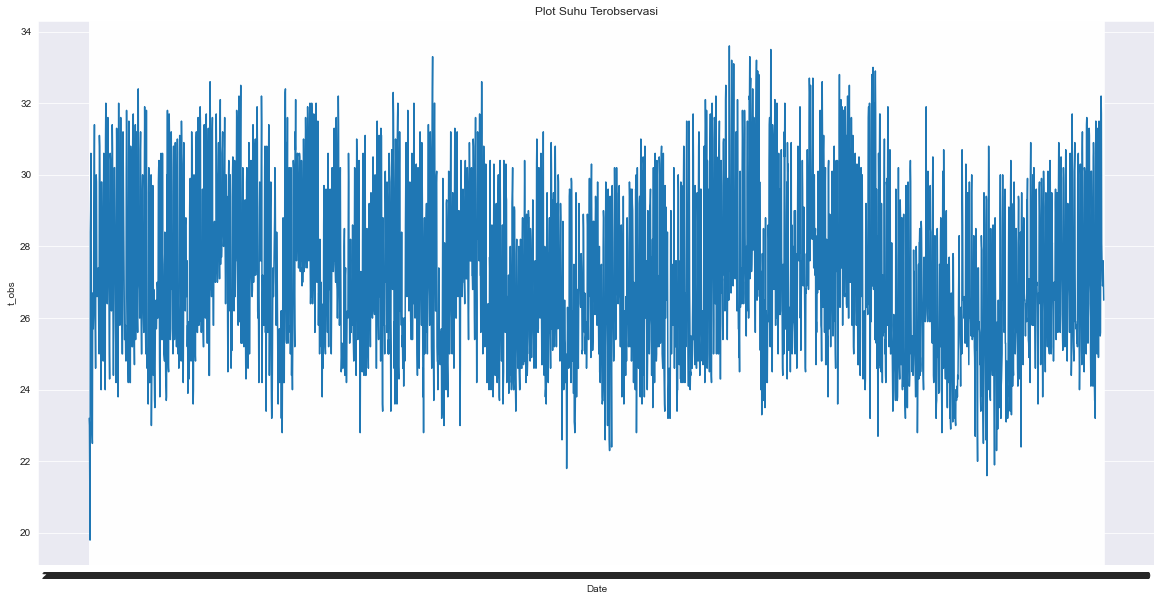

In [4]:
#Visualisasi dataset
plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
plt.xlabel('Date')
plt.ylabel('t_obs')
plt.title('Plot Suhu Terobservasi')
plt.plot(df_temperatur['t_obs'])

In [5]:
df_temperatur.describe()

lokasi  con_prec.mm.  mic_prec.mm.  sha_prec.mm.  suhu2m.degC.  \
count   3475.0   3475.000000  3.475000e+03        3475.0   3475.000000   
mean   96001.0      0.392399  4.111105e-02           0.0     27.605810   
std        0.0      1.269383  9.345307e-01           0.0      0.860646   
min    96001.0      0.000000  0.000000e+00           0.0     24.726800   
25%    96001.0      0.000000  0.000000e+00           0.0     27.046000   
50%    96001.0      0.002451  0.000000e+00           0.0     27.672400   
75%    96001.0      0.130356  6.085545e-32           0.0     28.219150   
max    96001.0     16.353500  5.296010e+01           0.0     29.910500   

       dew2m.degC.      rh2m...  wspeed.m.s.    wdir.deg.    lcloud...  ...  \
count  3475.000000  3475.000000  3475.000000  3475.000000  3475.000000  ...   
mean     24.210626    82.050818     5.445166   170.625577     0.630464  ...   
std       0.787647     5.136992     2.594237    81.412181     0.226076  ...   
min      20.764900    63.124800     0.068708     0.395599     0.000000  ...   
25%      23.793100    78.463750     3.328825    89.711100     0.503764  ...   
50%      24.308000    81.944700     5.324610   204.426000     0.669134  ...   
75%      24.736150    85.665300     7.514960   230.401000     0.790184  ...   
max      26.164800    94.876000    13.853000   358.684000     1.000000  ...   

        t500.degC.     rh500...   ws500.m.s.   wd500.deg.         hari  \
count  3475.000000  3475.000000  3475.000000  3475.000000  3475.000000   
mean     -5.181393    66.882721     6.088911   142.589790     0.150791   
std       0.708915    23.016426     2.938353    80.343336     0.357897   
min      -7.384020     0.160355     0.413269     1.235540     0.000000   
25%      -5.651965    54.639500     3.811925    84.460550     0.000000   
50%      -5.182040    72.365100     5.765610   110.949000     0.000000   
75%      -4.740340    84.679300     8.017465   203.407500     0.000000   
max      -2.512710    99.483900    18.572400   355.189000     1.000000   

          UTC           LAT           LON    ELEV        t_obs  
count  3475.0  3.475000e+03  3.475000e+03  3475.0  3475.000000  
mean     12.0  5.876550e+00  9.533785e+01   126.0    27.212576  
std       0.0  4.983398e-13  6.125760e-12     0.0     2.332946  
min      12.0  5.876550e+00  9.533785e+01   126.0    19.800000  
25%      12.0  5.876550e+00  9.533785e+01   126.0    25.400000  
50%      12.0  5.876550e+00  9.533785e+01   126.0    26.800000  
75%      12.0  5.876550e+00  9.533785e+01   126.0    29.100000  
max      12.0  5.876550e+00  9.533785e+01   126.0    33.600000  

[8 rows x 38 columns]

In [6]:
# split data
train_size = int(len(df_temperatur) * 0.8) # Menentukan banyaknya data train yaitu sebesar 70% data
train = df_temperatur[:train_size]
test = df_temperatur[train_size:]

In [7]:
correlation_matrix = df_temperatur.corr()

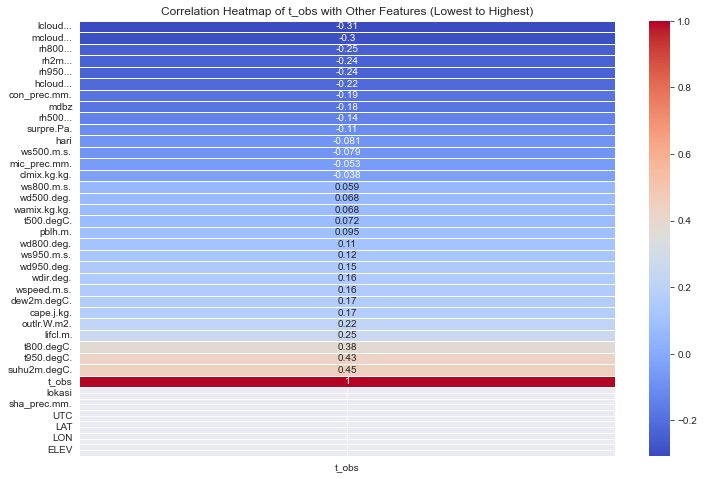

In [8]:
column_to_compare = "t_obs"

# Filter the correlation matrix to include only the correlations of the selected column
correlation_with_t_obs = correlation_matrix[[column_to_compare]]

# Sort the correlations in ascending order
correlation_with_t_obs_sorted = correlation_with_t_obs.sort_values(by=column_to_compare, ascending=True)

# Create a heatmap of the sorted correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_with_t_obs_sorted, annot=True, cmap="coolwarm", linewidths=.5)
plt.title(f"Correlation Heatmap of {column_to_compare} with Other Features (Lowest to Highest)")
plt.show()


In [9]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaler.fit(train[['t_obs']])

# train['t_obs_scaled'] = scaler.transform(train[['t_obs']])
# test['t_obs_scaled'] = scaler.transform(test[['t_obs']])

In [10]:
predictor = df_temperatur.drop(columns=['t_obs'])
predictor

lokasi  con_prec.mm.  mic_prec.mm.  sha_prec.mm.  \
Date                                                                    
2021-02-27 15:00:00   96001      0.000000  0.000000e+00             0   
2021-02-27 18:00:00   96001      0.000000  0.000000e+00             0   
2021-02-27 21:00:00   96001      0.000000  0.000000e+00             0   
2021-02-28 00:00:00   96001      0.000000  0.000000e+00             0   
2021-02-28 03:00:00   96001      0.000000  0.000000e+00             0   
...                     ...           ...           ...           ...   
2023-04-12 21:00:00   96001      0.000181  2.521340e-10             0   
2023-04-13 00:00:00   96001      0.669621  0.000000e+00             0   
2023-04-13 15:00:00   96001      0.110796  0.000000e+00             0   
2023-04-13 18:00:00   96001      0.191773  0.000000e+00             0   
2023-04-13 21:00:00   96001      0.115142  0.000000e+00             0   

                     suhu2m.degC.  dew2m.degC.  rh2m...  wspeed.m.s.  \
Date                                                                   
2021-02-27 15:00:00       27.3973      21.6059  70.8014      3.43326   
2021-02-27 18:00:00       27.0090      21.5161  72.0376      3.04901   
2021-02-27 21:00:00       26.5672      21.4226  73.5149      2.04556   
2021-02-28 00:00:00       26.4519      21.5400  74.5507      2.22508   
2021-02-28 03:00:00       26.7230      21.3691  72.6038      2.34268   
...                           ...          ...      ...          ...   
2023-04-12 21:00:00       27.5648      25.4250  88.2517      5.47214   
2023-04-13 00:00:00       26.9044      25.2219  90.6400      5.55761   
2023-04-13 15:00:00       28.6063      24.9508  80.7394      2.86711   
2023-04-13 18:00:00       27.9298      25.0292  84.3782      2.46416   
2023-04-13 21:00:00       27.6392      25.0946  86.1593      2.71889   

                     wdir.deg.  lcloud...  ...  wd800.deg.  t500.degC.  \
Date                                       ...                           
2021-02-27 15:00:00    12.4580   0.553781  ...    281.6220    -5.20890   
2021-02-27 18:00:00    27.2450   0.640686  ...    250.9690    -5.05963   
2021-02-27 21:00:00    37.3569   0.717464  ...    227.0300    -4.89987   
2021-02-28 00:00:00    20.1816   0.698006  ...    120.1200    -4.72228   
2021-02-28 03:00:00    14.7934   0.626203  ...    137.4190    -4.64246   
...                        ...        ...  ...         ...         ...   
2023-04-12 21:00:00   229.0580   0.758010  ...     97.9713    -3.94266   
2023-04-13 00:00:00   245.6290   0.914715  ...    111.7730    -3.95491   
2023-04-13 15:00:00   300.4140   0.725273  ...     70.9362    -4.25857   
2023-04-13 18:00:00   269.6540   0.724071  ...     67.7536    -3.84476   
2023-04-13 21:00:00   263.8010   0.766846  ...     83.7996    -3.80490   

                     rh500...  ws500.m.s.  wd500.deg.  hari  UTC      LAT  \
Date                                                                        
2021-02-27 15:00:00   11.0889     6.22327     57.5841     0   12  5.87655   
2021-02-27 18:00:00   12.7044     5.96761     59.9813     0   12  5.87655   
2021-02-27 21:00:00   15.2381     7.04134     67.3222     0   12  5.87655   
2021-02-28 00:00:00   16.3007     7.54606     65.4942     0   12  5.87655   
2021-02-28 03:00:00   19.0442     8.93947     73.4932     0   12  5.87655   
...                       ...         ...         ...   ...  ...      ...   
2023-04-12 21:00:00   18.1874     5.23077     37.2362     1   12  5.87655   
2023-04-13 00:00:00   21.7449     5.51392     50.4795     1   12  5.87655   
2023-04-13 15:00:00   16.9670     4.96094     73.0856     0   12  5.87655   
2023-04-13 18:00:00   10.2077     5.59534     79.9776     0   12  5.87655   
2023-04-13 21:00:00   16.1957     5.35180     92.1482     0   12  5.87655   

                          LON  ELEV  
Date                                 
2021-02-27 15:00:00  95.33785   126  
2021-02-27 18:00:00  95.33785   126  
2021-02-27 21:00:

In [11]:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(predictor)

In [12]:
#Deklarasi fungsi untuk mengecek stasioneritas data
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    plt.figure(figsize=(30,9))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [87]:
#Menginisialkan variabel High sebagai data time series
ts = df_temperatur['t_obs']
ts.index = df_temperatur.index

In [88]:
ts

Date
2021-02-27 15:00:00    23.2
2021-02-27 18:00:00    23.0
2021-02-27 21:00:00    21.6
2021-02-28 00:00:00    19.8
2021-02-28 03:00:00    28.4
                       ... 
2023-04-12 21:00:00    26.9
2023-04-13 00:00:00    27.0
2023-04-13 15:00:00    27.6
2023-04-13 18:00:00    27.1
2023-04-13 21:00:00    26.5
Name: t_obs, Length: 3475, dtype: float64

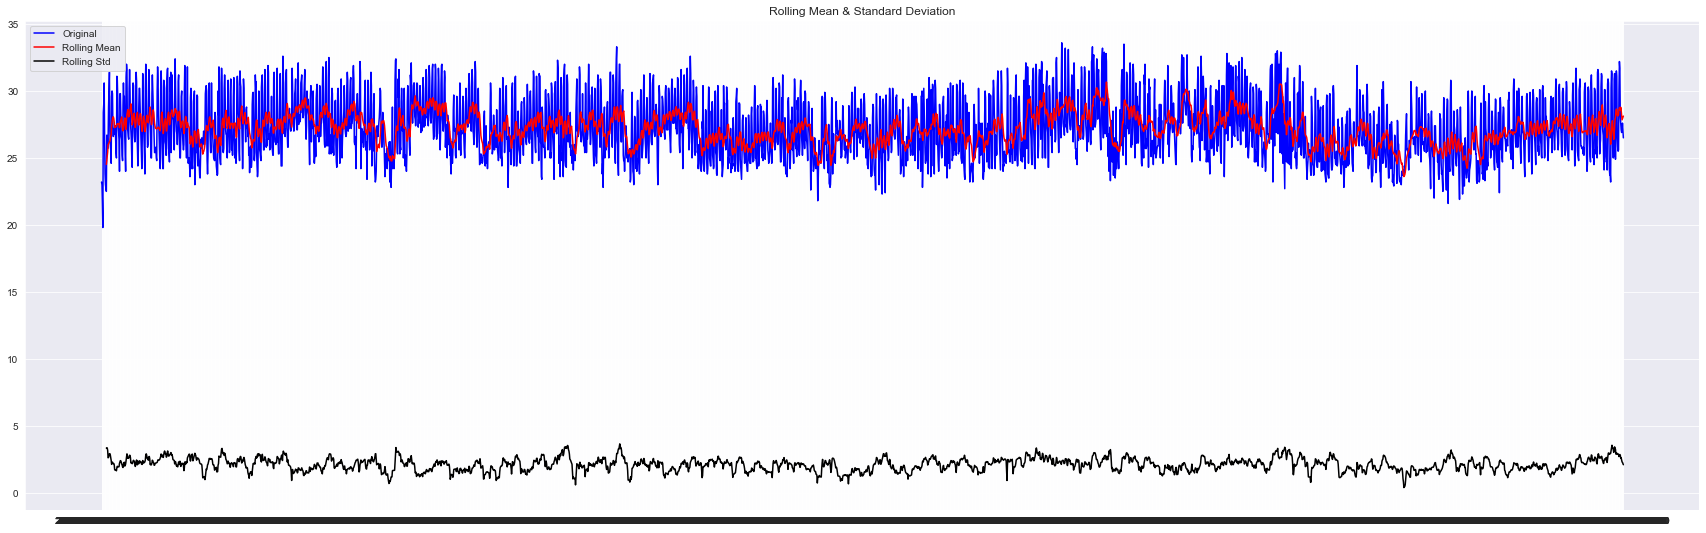

Results of Dickey-Fuller Test:
Test Statistic                -6.948589e+00
p-value                        9.825337e-10
#Lags Used                     2.800000e+01
Number of Observations Used    3.446000e+03
Critical Value (1%)           -3.432249e+00
Critical Value (5%)           -2.862379e+00
Critical Value (10%)          -2.567217e+00
dtype: float64


In [14]:
#Melakukan uji stasioneritas untuk dataset
test_stationarity(ts)

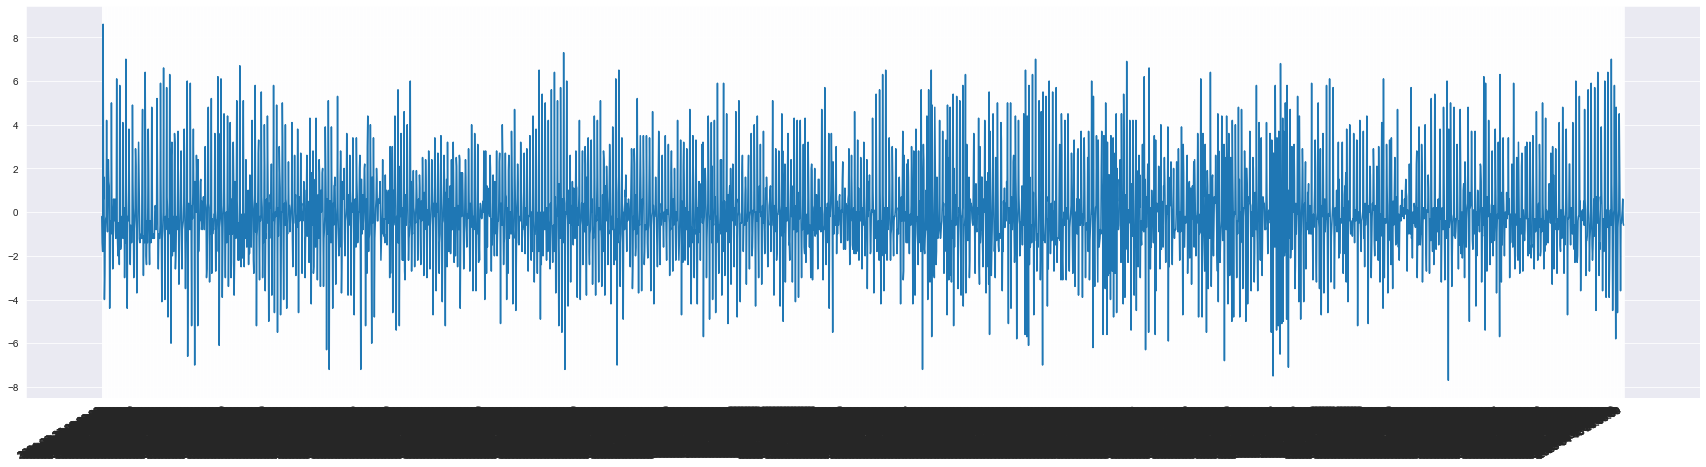

In [15]:
fig, ax = plt.subplots(1, figsize = (30, 8))
ts_diff_1 = ts - ts.shift()
ts_diff_1 = ts_diff_1.dropna()
fig.autofmt_xdate()
plt.plot(ts_diff_1)

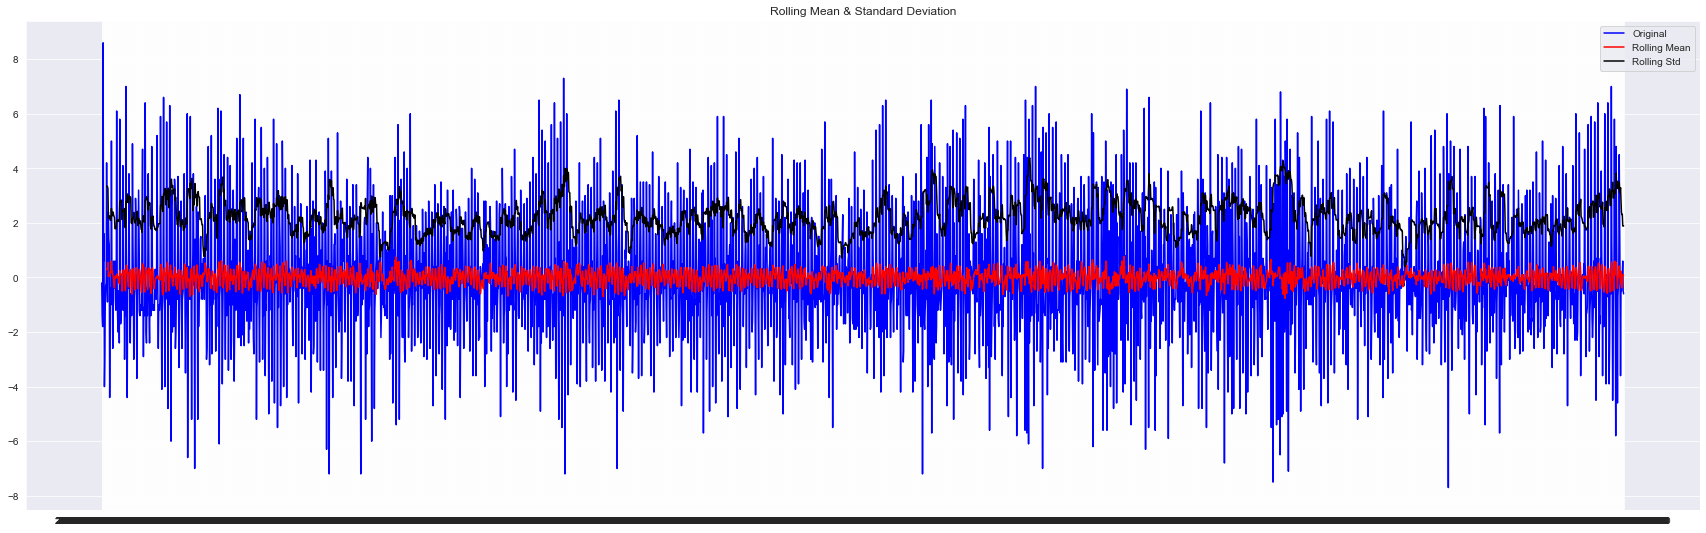

Results of Dickey-Fuller Test:
Test Statistic                -1.643961e+01
p-value                        2.434868e-29
#Lags Used                     2.800000e+01
Number of Observations Used    3.445000e+03
Critical Value (1%)           -3.432250e+00
Critical Value (5%)           -2.862379e+00
Critical Value (10%)          -2.567217e+00
dtype: float64


In [16]:
test_stationarity(ts_diff_1)

c:\Users\Nycht\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


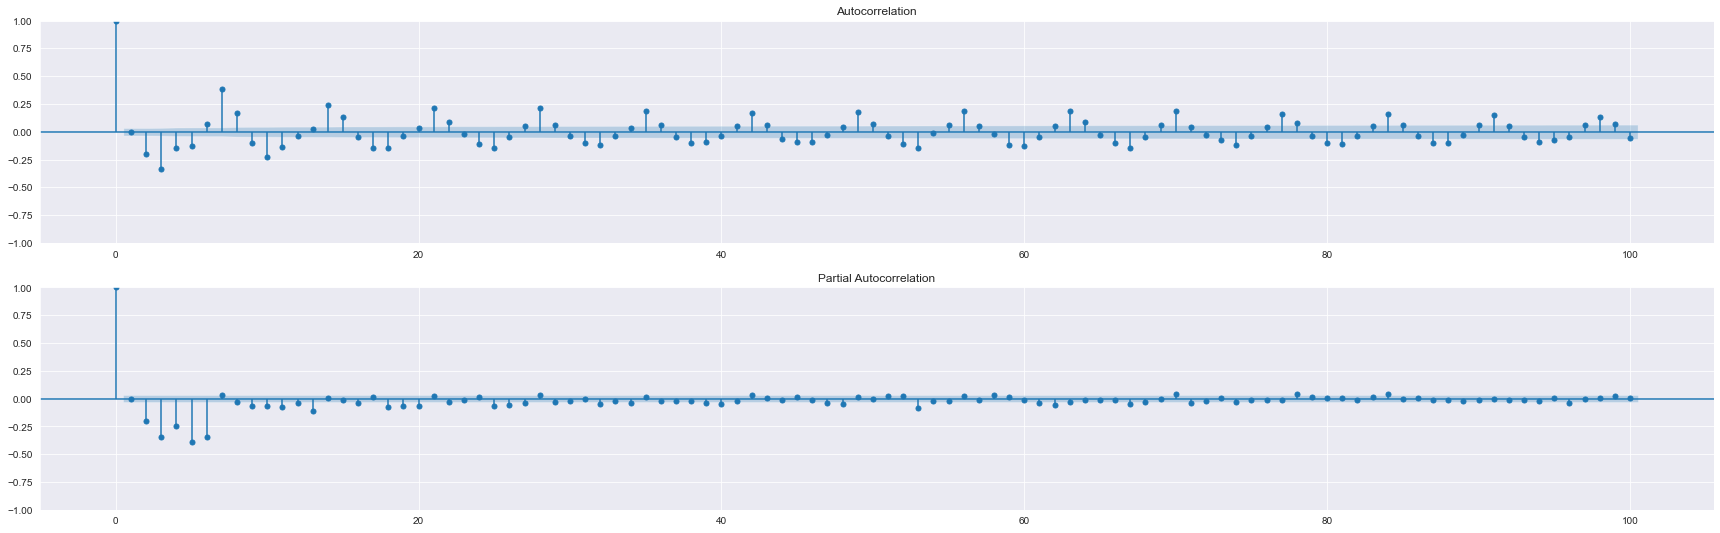

In [17]:
plt.figure(figsize=(30,9))
plt.subplot(211)
plot_acf(ts_diff_1, ax=plt.gca(), lags=100)
plt.subplot(212)
plot_pacf(ts_diff_1, ax=plt.gca(), lags=100)
plt.show()

In [18]:
from math import sqrt
from sklearn.metrics import mean_squared_error

def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.7)               #data trainingnya 70%
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		# print('test1')     
		model = ARIMA(history, order=arima_order)    
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	rmse = sqrt(mean_squared_error(test, predictions))
	print(f'rmse = {rmse}')
	return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				print(f'trying ({p},{d},{q})')
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [19]:
p_values = range(0, 2)
d_values = range(0, 2)
q_values = range(0, 2)
evaluate_models(ts.values, p_values, d_values, q_values)

trying (0,0,0)
rmse = 2.3780467848686055
ARIMA(0, 0, 0) RMSE=2.378
trying (0,0,1)
rmse = 1.9859218336209572
ARIMA(0, 0, 1) RMSE=1.986
trying (0,1,0)
rmse = 2.2149020266223864
ARIMA(0, 1, 0) RMSE=2.215
trying (0,1,1)
rmse = 2.2155867420039512
ARIMA(0, 1, 1) RMSE=2.216
trying (1,0,0)
rmse = 1.9613811359935742
ARIMA(1, 0, 0) RMSE=1.961
trying (1,0,1)
rmse = 1.9147472126786138
ARIMA(1, 0, 1) RMSE=1.915
trying (1,1,0)
rmse = 2.215313105318485
ARIMA(1, 1, 0) RMSE=2.215
trying (1,1,1)


c:\Users\Nycht\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Nycht\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


rmse = 2.0212944926903047
ARIMA(1, 1, 1) RMSE=2.021
Best ARIMA(1, 0, 1) RMSE=1.915


In [107]:
ts_diff_1

Date
2021-02-27 18:00:00   -0.2
2021-02-27 21:00:00   -1.4
2021-02-28 00:00:00   -1.8
2021-02-28 03:00:00    8.6
2021-02-28 06:00:00    0.6
                      ... 
2023-04-12 21:00:00   -0.2
2023-04-13 00:00:00    0.1
2023-04-13 15:00:00    0.6
2023-04-13 18:00:00   -0.5
2023-04-13 21:00:00   -0.6
Name: t_obs, Length: 3474, dtype: float64

In [108]:
ts

Date
2021-02-27 15:00:00    23.2
2021-02-27 18:00:00    23.0
2021-02-27 21:00:00    21.6
2021-02-28 00:00:00    19.8
2021-02-28 03:00:00    28.4
                       ... 
2023-04-12 21:00:00    26.9
2023-04-13 00:00:00    27.0
2023-04-13 15:00:00    27.6
2023-04-13 18:00:00    27.1
2023-04-13 21:00:00    26.5
Name: t_obs, Length: 3475, dtype: float64

In [110]:
ts_diff_train_size = int(len(ts_diff_1) * 0.8)               #data trainingnya 80%
ts_diff_train, ts_diff_test = ts_diff_1[0:ts_diff_train_size], ts_diff_1[ts_diff_train_size:]

In [116]:
ts_diff_train

Date
2021-02-27 18:00:00   -0.2
2021-02-27 21:00:00   -1.4
2021-02-28 00:00:00   -1.8
2021-02-28 03:00:00    8.6
2021-02-28 06:00:00    0.6
                      ... 
2022-10-31 21:00:00   -0.3
2022-11-01 00:00:00    0.0
2022-11-01 03:00:00    5.0
2022-11-01 06:00:00   -0.4
2022-11-01 09:00:00   -0.7
Name: t_obs, Length: 2779, dtype: float64

c:\Users\Nycht\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Nycht\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Nycht\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


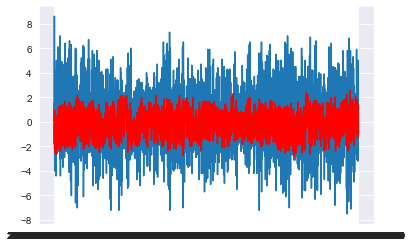

In [112]:
#Visualisasi perbandingan antara dataset setelah differencing dengan data hasil prediksi ARIMA(1,0,1)
model_ARIMA = ARIMA(ts_diff_train.values, order=(1,0,1))
results_ARIMA = model_ARIMA.fit()
predictions_ARIMA = pd.Series(results_ARIMA.fittedvalues,copy=True)
plt.plot(ts_diff_train)             
plt.plot(predictions_ARIMA, color='red')

In [113]:
#Informasi yang diperoleh dari pemodelan ARIMA(1,0,1) pada dataset
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2779
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -5823.943
Date:                Fri, 13 Oct 2023   AIC                          11655.885
Time:                        17:49:53   BIC                          11679.605
Sample:                             0   HQIC                         11664.450
                               - 2779                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.573e-05      0.001      0.034      0.973      -0.001       0.002
ar.L1          0.5160      0.018     28.432      0.000       0.480       0.552
ma.L1         -0.9911      0.003   -354.153      0.000      -0.997      -0.986
sigma2         3.8669      0.130     29.638      0.000       3.611       4.123
===================================================================================
Ljung-Box (L1) (Q):                  71.40   Jarque-Bera (JB):                73.13
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.23   Skew:                             0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [122]:
predictions_ARIMA

0       0.000026
1       0.048421
2       0.443698
3       0.948780
4      -2.139853
          ...   
2774    1.323430
2775    1.454274
2776    1.441411
2777   -0.947162
2778   -0.748697
Length: 2779, dtype: float64

In [125]:
#Prediksi data dengan model ARIMA(1,1,1) untuk 4 hari ke depan
predict_dif = results_ARIMA.predict(start=2779,end=2786)

In [132]:
#Prediksi data dengan model ARIMA(1,1,1) untuk 4 hari ke depan
predict_dif = results_ARIMA.predict(start=2779,end=2783)
predictions_dif_cum_sum = predict_dif.cumsum()                   #prediksi differencingnya
pred_ts = [ts[-1]]
for i, j in enumerate(predictions_dif_cum_sum):                  #prediksi data aslinya
  a = pred_ts[i] + j
  pred_ts.append(a)
predict = pd.Series(pred_ts[1:])
print(predict)
     

0    26.090559
1    25.469867
2    24.740186
3    23.954281
4    23.139377
dtype: float64


In [ ]:
import joblib

